In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair Trading final/data/Nifty_50_close_weekly.csv')
stock_names = data.columns[1:]
data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-09,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-01-16,74.924774,130.388138,446.682709,241.339020,231.093201,885.431335,58.148621,42.477810,55.848026,...,216.992065,218.241302,435.887360,86.313469,220.969604,43.924397,135.361099,153.767944,946.568054,153.599243
2,2011-01-23,78.103516,127.323494,440.269867,239.996140,226.377777,890.097961,57.267994,40.074051,54.025948,...,214.359619,212.933975,438.392639,86.851639,221.373337,42.233444,135.116898,159.999146,961.116760,154.310028
3,2011-01-30,81.487343,132.106247,484.641113,236.219772,244.198822,917.431091,57.945408,40.970615,55.465157,...,229.596161,221.787140,466.066864,87.969368,223.147934,43.826523,135.917892,166.711365,967.772949,146.755707
4,2011-02-06,72.316422,130.527466,463.705078,232.303726,228.809158,874.343567,53.059036,39.623344,56.553787,...,225.110825,201.701630,447.663940,82.339333,215.401688,43.181862,127.175156,168.208435,953.557190,145.489288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-03,2423.500000,837.700012,5361.962891,3148.350098,1021.150024,5998.149902,7127.549805,1654.400024,405.349609,...,555.140503,1184.597168,3429.220215,925.390076,697.500000,126.849998,1202.400024,3442.399902,8726.500000,396.005463
674,2023-12-10,2531.199951,878.650024,5617.482422,3194.550049,1125.599976,6201.700195,7407.649902,1696.250000,440.680450,...,584.891602,1224.171631,3471.021240,940.087524,705.599976,131.000000,1223.900024,3488.399902,9317.750000,406.582916
675,2023-12-17,2855.800049,1031.900024,5542.350586,3233.000000,1116.500000,6138.399902,7292.750000,1702.800049,444.500000,...,604.119141,1234.363525,3599.932617,943.861206,720.799988,130.050003,1233.300049,3630.500000,9670.900391,419.704926
676,2023-12-24,2980.600098,1094.300049,5493.693848,3332.050049,1111.349976,6465.700195,7587.600098,1724.599976,447.250000,...,637.804260,1245.649170,3813.681641,943.116394,730.799988,136.600006,1291.750000,3619.600098,9970.349609,444.302460


In [3]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

## Strat-1 MACD + RSI

In [4]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [5]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-05-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-05-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2023-12-03,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
660,2023-12-10,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
661,2023-12-17,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
662,2023-12-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [7]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,55.581917,56.290978,61.647384,39.092074,59.151215,49.246897,59.974244,64.078852,41.200653,...,54.799400,46.591639,55.807652,48.902353,49.524976,38.691622,56.858899,59.339447,55.507890,49.448834
1,2011-04-24,52.242237,60.376834,56.582467,41.113522,56.503309,54.468619,56.230053,59.778591,41.908372,...,51.881113,40.113935,50.120194,45.682060,47.955730,34.816634,51.411902,62.607897,50.060958,44.602887
2,2011-05-01,53.901890,55.799748,49.186493,50.507161,54.854620,57.816699,57.305275,64.321687,52.778113,...,62.807533,45.946213,57.473280,48.712974,52.314703,41.932371,53.880151,68.297444,48.557971,51.843478
3,2011-05-08,50.242853,52.004474,47.991745,57.805428,43.760464,53.846484,53.709772,58.723014,57.180699,...,47.202978,54.127284,51.431857,45.363885,50.192912,38.223549,47.466484,59.352532,52.903261,46.047500
4,2011-05-15,48.411821,39.345973,47.855210,57.794033,40.385080,41.808231,43.457469,50.412608,62.605253,...,43.618206,44.660361,48.256773,42.034529,44.688962,33.107282,43.678942,60.120174,48.903441,42.870120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2023-12-03,51.767500,58.662590,62.802753,50.394191,58.229024,80.633113,46.081929,62.786765,72.087005,...,46.905395,68.248550,53.770209,68.056173,70.752997,59.981245,55.782458,68.518487,63.526121,48.378568
660,2023-12-10,55.482950,63.574961,68.511531,53.128563,69.637019,82.719880,52.518149,66.260861,77.909577,...,55.627231,72.936094,55.875119,70.405735,71.828392,64.089484,57.985509,70.023646,72.586933,52.976236
661,2023-12-17,64.387171,75.370810,65.336327,55.335193,67.897204,79.838855,49.887405,66.783536,78.433339,...,60.179893,74.000651,61.671100,70.995625,73.776956,62.507568,58.948525,74.137253,76.363833,57.976610
662,2023-12-24,67.110949,78.433344,63.290586,60.494826,66.878834,83.113739,55.981026,68.530877,78.822660,...,66.637934,75.165552,68.953215,70.696106,75.001992,68.314663,64.411010,73.306259,79.005248,65.403306


In [8]:
prices = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair Trading final/data/Nifty_50_monthly.csv')
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-01,47.456532,137.573227,549.450989,286.860901,214.776230,1281.127686,71.013489,61.910526,62.056656,...,191.493057,253.606613,477.968262,104.154602,255.928055,31.875605,117.143425,214.990906,1354.889282,143.137146
1,2012-04-01,39.865295,121.319275,589.651245,297.220978,215.130188,1195.199463,76.656906,61.789082,64.741058,...,183.867844,264.228363,468.033325,97.399536,265.123108,32.492043,140.719421,228.096069,1429.621582,149.302628
2,2012-05-01,36.144112,118.087219,584.661865,321.574951,205.526825,1149.671997,81.694191,71.388519,61.934216,...,184.748184,274.942139,496.642700,100.777069,291.654572,31.810171,135.947281,228.706696,1360.483398,136.112503
3,2012-06-01,31.050920,117.431427,609.323608,344.253143,179.688110,1082.265015,77.616608,63.533115,65.414513,...,178.242645,262.223785,479.927795,89.209038,215.077286,27.405582,128.936325,207.945114,1402.081177,135.270279
4,2012-07-01,30.416700,116.869347,583.141174,359.998016,194.733078,1125.084717,83.434517,65.583191,70.373581,...,191.749817,292.476044,496.762115,99.594940,227.911987,30.783926,144.215088,211.702850,1448.603760,136.213959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2023-08-01,2481.100098,765.349976,5018.615723,3337.124512,959.900024,4923.950195,7269.700195,1572.349976,356.493958,...,601.758667,1136.968750,3402.530029,850.810730,643.650024,123.199997,1131.303711,3001.899902,8281.799805,406.083984
138,2023-09-01,2450.050049,799.500000,4835.987793,3253.869873,991.150024,4668.450195,7320.600098,1514.500000,328.672180,...,560.156372,1102.713989,3330.724854,838.298096,611.200012,127.050003,1214.952026,3116.800049,8262.400391,415.463959
139,2023-10-01,2387.250000,831.400024,5114.336426,3161.331543,1041.050049,5016.450195,7967.600098,1561.050049,325.950745,...,593.005493,1134.979980,3463.443359,865.855713,620.450012,128.000000,1203.228271,3196.250000,8304.900391,404.587158
140,2023-11-01,2217.300049,769.099976,4792.226562,2929.436279,971.799988,5344.350098,7471.899902,1572.849976,340.799225,...,557.058350,1109.873169,3291.365479,896.889099,627.700012,116.599998,1113.099976,3173.399902,8381.450195,380.139313


In [9]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade


In [10]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

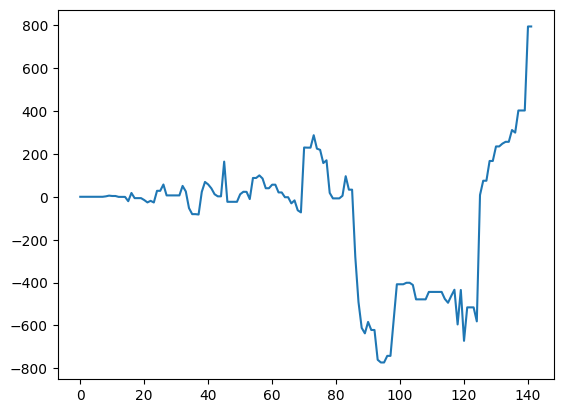

In [11]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

## Strat-2 RSI

In [12]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [13]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

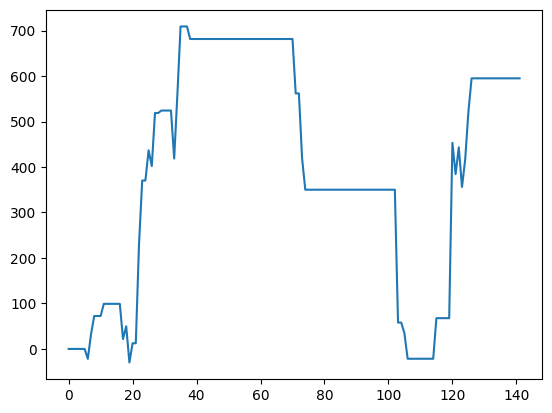

In [14]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()